# Implement some Python support functions

In [1]:
# !pip3 install matplotlib

import os,sys,boto3, time
from pprint import pprint

# I am setting False here since Valerio does not have the github repo cloned
use_nsdf_package=False

if use_nsdf_package:
	sys.path.append("../")
	from nsdf.kernel import NormalizeEnv, SetEnv
	SetEnv(NormalizeEnv({
		"include-vault": [
			"s3-wasabi",
		]
	}))
else:	

	# change as needed
	os.environ["AWS_ACCESS_KEY_ID"]="XXXXX"
	os.environ["AWS_SECRET_ACCESS_KEY"]="YYYYY"
	os.environ["AWS_DEFAULT_REGION"]="us-west-1"
	os.environ["AWS_ENDPOINT_URL"]="https://s3.us-west-1.wasabisys.com"

bucket="Pania_2021Q3_in_situ_data"

# ////////////////////////////////////////////////////////
def Connect():
	"""
	Function to connect to object storage with environment credentials
	"""
	session=boto3.session.Session()
	return session.client('s3',
		aws_access_key_id=os.environ["AWS_ACCESS_KEY_ID"], 
		aws_secret_access_key=os.environ["AWS_SECRET_ACCESS_KEY"], 
		region_name=os.environ["AWS_DEFAULT_REGION"],
		endpoint_url=os.environ["AWS_ENDPOINT_URL"])

# ////////////////////////////////////////////////////////
def DownloadObject(bucket, key, local, force=False):
	"""
	Download object from S3
	"""
	if not force and os.path.isfile(local): return
	t1=time.time()
	os.makedirs(os.path.dirname(local),exist_ok=True)
	Connect().download_file(bucket, key, local)
	size=os.stat(local).st_size
	MiB=1024*1024
	sec=time.time()-t1
	mb_sec=int(size/(sec*MiB))
	print(f"Downloaded Object {key} in {time.time()-t1} seconds size({size}) mb_sec({mb_sec})")

# ////////////////////////////////////////////////////////
def ReadImage(filename):
	"""
	Read an image from local filesystem
	"""
	import imageio.v2 as imageio
	return imageio.imread(filename)


%matplotlib inline
from matplotlib import pyplot as plt

# //////////////////////////////////////////////////////
def ShowImage(img, title="", color_map='gray',width=6):
	"""
	Show an image using matplotlib
	"""
	img=img.astype(float)
	ratio=float(img.shape[1])/img.shape[0]
	fig=plt.figure(figsize = (width,width*ratio))
	plot=plt.imshow(img, cmap=plt.get_cmap(color_map))
	if title:
		plt.title(title)
	return (fig,plot)

# //////////////////////////////////////////////////////
def ShowImages(images, ncols=4, single_width=4, color_map='gray'):
	"""
	Show images in a grid
	"""
	for I in range(len(images)):
		images[I]["img"]=images[I]["img"].astype(float)

	first=images[0]
	ratio=float(first["img"].shape[1])/first["img"].shape[0]
	single_height=single_width*ratio
	N=len(images)
	nrows=N//ncols + (1 if N % ncols else 0)
	fig = plt.figure(figsize=(single_width*ncols, single_height*nrows))
	for I in range(N):
		fig.add_subplot(nrows, ncols, I+1)
		plt.imshow(images[I]["img"], cmap=plt.get_cmap(color_map))
		plt.axis('off')
		plt.title(images[I]["title"])



The following is a list of converted files:

In [2]:

files=[
	# generated with v1 script
	"fly_scan_id_112509.h5",
	"fly_scan_id_112512.h5",
	"fly_scan_id_112515.h5",
	"fly_scan_id_112517.h5",
	"fly_scan_id_112520.h5",
	"fly_scan_id_112522.h5",
	"fly_scan_id_112524.h5",
	"fly_scan_id_112526.h5",
	"fly_scan_id_112528.h5",
	"fly_scan_id_112530.h5",
	"fly_scan_id_112532.h5",
	"fly_scan_id_112545.h5",
	"fly_scan_id_112548.h5",
	"fly_scan_id_112550.h5",
	"fly_scan_id_112552.h5",
	"fly_scan_id_112554.h5",
	"fly_scan_id_112556.h5",
	"fly_scan_id_112558.h5",
	"fly_scan_id_112560.h5",
	"fly_scan_id_112577.h5",
	"fly_scan_id_112579.h5",
	"fly_scan_id_112581.h5",
	"fly_scan_id_112583.h5",
	"fly_scan_id_112585.h5",
	"fly_scan_id_112587.h5",
	"fly_scan_id_112589.h5",
	"fly_scan_id_112591.h5",
	"fly_scan_id_112593.h5",
	"fly_scan_id_112595.h5",
	"fly_scan_id_112597.h5",
	"fly_scan_id_112599.h5",
	"fly_scan_id_112601.h5",
	"fly_scan_id_112603.h5",

	# generated with V2 reconstruction script (i.e. white HDF5)
	"fly_scan_id_112437.h5",
	"fly_scan_id_112441.h5",
	"fly_scan_id_112443.h5",
	"fly_scan_id_112451.h5",
	"fly_scan_id_112453.h5",
	"fly_scan_id_112455.h5",
	"fly_scan_id_112458.h5",
	"fly_scan_id_112461.h5",
	"fly_scan_id_112464.h5",
	"fly_scan_id_112467.h5",
	"fly_scan_id_112470.h5",
	"fly_scan_id_112475.h5",
	"fly_scan_id_112478.h5",
	"fly_scan_id_112482.h5",
	"fly_scan_id_112484.h5",
	"fly_scan_id_112487.h5",
	"fly_scan_id_112489.h5",
	"fly_scan_id_112491.h5",
	"fly_scan_id_112493.h5",
	"fly_scan_id_112495.h5",
	"fly_scan_id_112500.h5",
	"fly_scan_id_112502.h5",
	"fly_scan_id_112504.h5"
]

# Show TIFF reconstructions at a certain offset

NOTE: 
- each reconstruction file is 50MB so the first run could take a while
- for example with my EU connection to Wasabi US (3MB/sec) it will take 50MB*56/3=~15 minutes just to render this cell

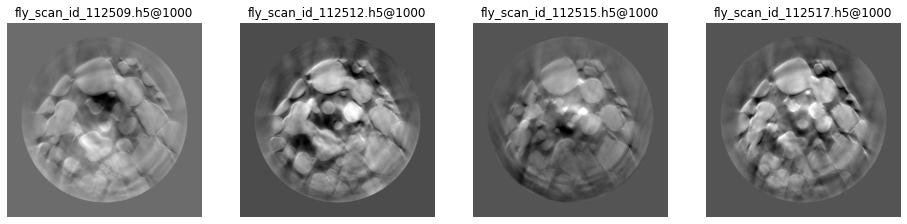

In [3]:
def GetTIFFReconstructions(offset=0, max_files=0):
	images=[]
	for I,file in enumerate(files):
		if max_files and I==max_files: break # in case you want a quick-preview of some files
		remote=f"workflow/{file}/r/tif/i_{offset:05}.tiff"
		local_filename=f"/tmp/{remote}" # IMPORTANT: checkout the /tmp directory and soon or later remove the files
		DownloadObject(bucket, remote, local_filename)
		images.append({"title": f"{file}@{offset}", "img": ReadImage(local_filename)})


	return images

ShowImages(GetTIFFReconstructions(offset=1000, max_files=4))

# Show TIFF segmentations at a certain offset 
Note:
- segmentations are 10x smaller than reconstructions

In [ ]:
def GetTIFFSegmentations(offset=0, max_files=4):
	images=[]
	for I, file in enumerate(files):
		if max_files and I==max_files: break # in case you want a quick-preview of some files
		remote=f"workflow/{file}/s/tif/i_{offset:05}.tiff"
		local_filename=f"/tmp/{remote}" # IMPORTANT: checkout the /tmp directory and soon or later remove the files
		DownloadObject(bucket, remote, local_filename)
		images.append({"title": f"{file}@{offset}", "img": ReadImage(local_filename)})
	return images

ShowImages(GetTIFFSegmentations(offset=1000, max_files=4))

# Show z-slices data using OpenVisus

Note:
- resolutions values are not optimal. We need to find better heuristics.

In [ ]:
# {sys.executable} -m pip install OpenVisus
import OpenVisus as ov

# ///////////////////////////////////////////////////////////////////////////////////////
def ReadVisusSlice(db=None, x=None, y=None, z=None, time=None, field=None, access=None, resolution=-2, resample=False):

	"""" 

	TODO: make this heuristic better
	      my understanding is that with resolution=0 I want to see all samples
			resolution=-1 axis=2 means I want to ignore half-samples of Z

Example:
																				223  333
																				890  123
	----------------------------------------------------------------
	bitmask V(012)(012)(012)(012)(012)(012)(012)(012)(012)(012)(012)

	z=[1000,1001],resolution=-0 -> H= 33
	y=[1000,1001],resolution=-0 -> H= 33
	x=[1000,1001],resolution=-0 -> H= 33

	z=[1000,1001],resolution=-1 -> H= 32
	y=[1000,1001],resolution=-1 -> H= 31
	x=[1000,1001],resolution=-1 -> H= 30

	z=[1000,1001],resolution=-2 -> H= 29
	y=[1000,1001],resolution=-2 -> H= 28
	x=[1000,1001],resolution=-2 -> H= 27
	"""

	assert resolution<=0

	H=db.getMaxResolution()
	bitmask=db.db.getBitmask().toString()
	BOX,SIZE = db.getLogicBox(),db.getLogicSize()
	assert bitmask[0]=="V" and (len(bitmask)-1)==H

	bounds=[x,y,z]

	for A in range(3):

		if bounds[A] is None: 
			bounds[A]=[BOX[0][A],BOX[1][A]] # box is in the format [x1,y1,z1] [x2,y2,z2]
	
		if isinstance(bounds[A],int): 
			bounds[A]=[bounds[A],bounds[A]+1]

		if (bounds[A][1]-bounds[A][0])==1: 
			axis, offset=A, bounds[A][0]

		assert (bounds[A][1]-bounds[A][0])>=1

	# choose the max_resolution and align the offset
	factor=1
	for I in range(H,0,-1):
		
		# I want full resolution
		if resolution==0:
			H=I
			break

		# example: -1 means I want to 'jump' one Z bit in the bitmask (given the axis ==2)
		if ord(bitmask[I])-ord('0')==axis:
			resolution+=1
			factor*=2
			offset=(offset // factor) * factor
			bounds[axis][0]=offset
			bounds[axis][1]=offset+1

	logic_box=[
		[bounds[0][0], bounds[1][0], bounds[2][0]],
		[bounds[0][1], bounds[1][1], bounds[2][1]]
	]

	print("bitmask",bitmask,"H",H,"axis",axis,"offset",offset)
	ret = db.read(logic_box=logic_box, max_resolution=H, time=time, field=field, access=access)

	# lower the dimension to match the pdim
	if axis==0: ret=ret[:,:,0]
	if axis==1: ret=ret[:,0,:]
	if axis==2: ret=ret[0,:,:]

	# resample
	if resample==True:
		X,Y=(axis+1) % 3,(axis+2) % 3
		X,Y=min(X,Y),max(X,Y)
		resample=[SIZE[X],SIZE[Y]]

	# resample
	if	isinstance(resample,(tuple,list)) :
		from skimage.transform import resize
		ret = resize(ret, resample, preserve_range=True).astype(ret.dtype)

	return ret

# ///////////////////////////////////////////////////////////
def ReadVisusSlices(axis=2,offset=0, resolution=-2, type="r", time=None, max_files=0):
	images=[]
	for I, file in enumerate(files):

		# in case you want a quick-preview of some files
		if max_files and I==max_files: 
			break 

		url=f"https://atlantis.sci.utah.edu/mod_visus?dataset={file}-{type}"
		print(url)
		db=ov.LoadDataset(url)
		
		img=ReadVisusSlice(db=db, 
			x=offset if axis==0 else None,
			y=offset if axis==1 else None,
			z=offset if axis==2 else None, 
			resolution=resolution,
			time=time) 

		print("shape",img.shape)
		images.append({"title": file, "img": img})

	return images

Show reconstructions:

In [ ]:
images=ReadVisusSlices(axis=2,offset=1024,resolution=-4, type="r", max_files=4)
ShowImages(images)

Show segmentations:

In [ ]:
images=ReadVisusSlices(axis=2, offset=1024, resolution=-4, type="s", max_files=4)
ShowImages(images)

# Show other OpenVisus slices

In [ ]:
type="r"
key="fly_scan_id_112437.h5"
db=ov.LoadDataset(f"https://atlantis.sci.utah.edu/mod_visus?dataset={key}-{type}")

max_files=4
images=[]
for I,offset in enumerate(range(0,2160,100)):
	if max_files and I==max_files:
		break
	img=ReadVisusSlice(db=db, x=None, y=None,z=offset, resolution=-4) 
	print("shape",img.shape)
	images.append({"title": f"{key}-{type}-{offset}", "img": img})
	
ShowImages(images)


Show difference of two timestamp:
- HDF5 files are not really timestamps, but we created two datasets with times: `fly_scan_time-r` and `fly_scan_time-s`)
- time is in the range [0,56] (extrema included)

In [ ]:
def ShowDifferenceImage(db, t1,t2):
	t1= 0;img_a=ReadVisusSlice(db=db, x=None, y=None,z=1024, resolution=-4, time=t1)
	t2=20;img_b=ReadVisusSlice(db=db, x=None, y=None,z=1024, resolution=-4, time=t2)
	ShowImages([
		{"title": f"time-{t1}","img": img_a},
		{"title": f"time-{t2}","img": img_b},
		{"title": "diff","img":img_a-img_b}
	])

db=ov.LoadDataset("https://atlantis.sci.utah.edu/mod_visus?dataset=fly_scan_time-r")
ShowDifferenceImage(db,0,20)